In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 15s 1us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

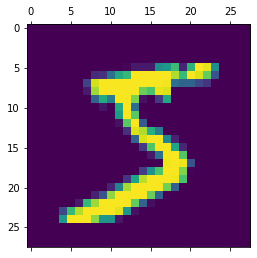

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

In [12]:
#lets scale down array values for digits(because they contains values from 0 to 255)
X_train = X_train / 255
X_test = X_test / 255

In [15]:
#Now we'll convert this 2D (28x28) matrix into 1D
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4740 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3040 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2832 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2663 - accuracy: 0.9258


In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2679 - accuracy: 0.9259


[0.267860472202301, 0.9258999824523926]

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 2s 1ms/step


array([3.4386806e-02, 5.0745888e-07, 7.3088139e-02, 9.6697289e-01,
       2.0910427e-03, 1.4940950e-01, 1.5810875e-06, 9.9979270e-01,
       1.0851673e-01, 7.1814078e-01], dtype=float32)

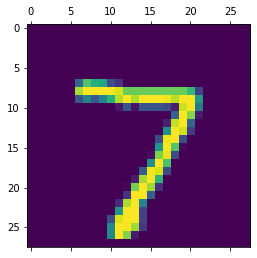

In [21]:
plt.matshow(X_test[0])

In [23]:
np.argmax(y_predicted[0]) #np.argmax finds a maximum element from an array and returns the index of it

7

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    9,  921,   19,    6,    3,   12,   11,   42,    4],
       [   3,    0,   14,  924,    0,   28,    2,   12,   21,    6],
       [   1,    1,    6,    2,  895,    0,   11,    6,   13,   47],
       [  10,    1,    3,   33,    7,  776,   15,    7,   34,    6],
       [  11,    3,    7,    1,    7,   11,  914,    2,    2,    0],
       [   1,    5,   21,    7,    6,    0,    0,  949,    4,   35],
       [   7,    6,    6,   22,    8,   22,    9,   10,  876,    8],
       [  11,    7,    1,   11,   15,   10,    0,   22,    5,  927]])>

Text(69.0, 0.5, 'Truth')

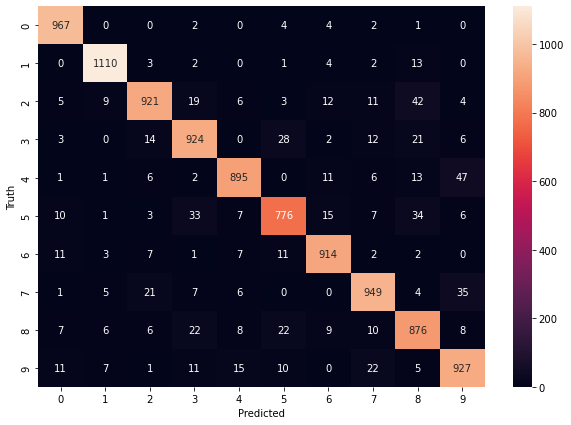

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Hidden Layer

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2711 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1224 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9835


In [30]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9769


[0.07935243099927902, 0.9768999814987183]

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2706 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1193 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0828 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0630 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0495 - accuracy: 0.9851


In [34]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9753


[0.07715026289224625, 0.9753000140190125]